# Esame Laboratorio di Programmazione II - 27/06/2025


## Esercizio 1

Crea un array NumPy con i prezzi (in euro) di 5 libri: **14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30**

1. Calcola il prezzo medio dei libri
2. Seleziona i libri con un prezzo maggiore della media.
3. Crea un nuovo array che applica uno sconto del 10% solo ai libri che costano più della media.

In [23]:
import numpy as np

prezzi = np.array([14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30])
prezzo_medio = prezzi.mean()
max_prez = prezzi[prezzi > prezzo_medio]
new_prezzi = np.where(prezzi > prezzo_medio, prezzi*1.10, prezzi)

## Esercizio 2

Simula 1000 lanci di una moneta che ad ogni lancio ha il doppio di probabilità di risultare croce invece che testa. Ogni lancio è rappresentato da 1 (testa) o 0 (croce).

1. Crea un array NumPy contenente i risultati.
2. Calcola la proporzione di teste dopo ogni 50 lanci cumulativi.
3. Crea un grafico della proporzione cumulativa nel tempo (dopo 50 lanci, dopo 100, dopo 150,...).

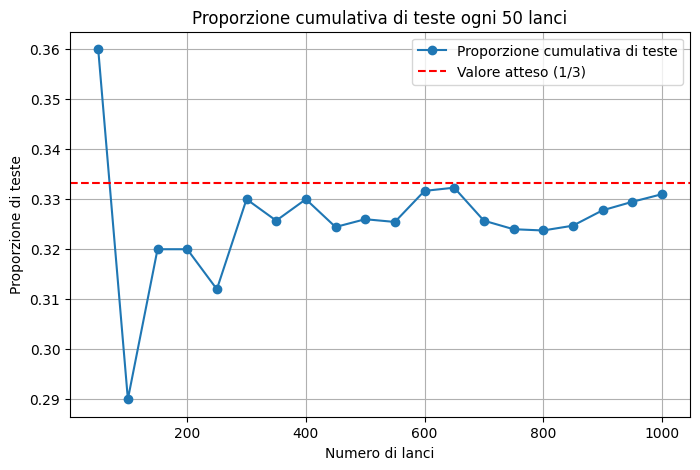

In [24]:
#by chatgpt
import numpy as np
import matplotlib.pyplot as plt

# 1. Simuler 1000 lancers
n_lanci = 1000
p_testa = 1/3    # proba de 1 (testa)
p_croce = 2/3    # proba de 0 (croce)

# np.random.choice permet de simuler les lancers
np.random.seed(0)
lanci = np.random.choice([0, 1], size=n_lanci, p=[p_croce, p_testa])

# 2. Proportion cumulée de teste après chaque 50 lancers
steps = np.arange(50, n_lanci+1, 50)   # [50, 100, 150, ... 1000]
proporzioni = [lanci[:i].mean() for i in range(50, 1001, 50)]

# 3. Graphique
plt.figure(figsize=(8,5))
plt.plot(steps, proporzioni, marker="o", linestyle="-", label="Proporzione cumulativa di teste")
plt.axhline(p_testa, color="red", linestyle="--", label="Valore atteso (1/3)")
plt.xlabel("Numero di lanci")
plt.ylabel("Proporzione di teste")
plt.title("Proporzione cumulativa di teste ogni 50 lanci")
plt.legend()
plt.grid(True)
plt.show()


## Esercizio 3

Crea una funzione di nome **mat_normalizzata** che prende come input una matrice e ritorna la matrice normalizzata.

La funzione deve quindi:
1. Calcolare la media e la deviazione standard della matrice.
2. Normalizzare la matrice sottraendo la media e dividendo per la deviazione standard.

Testa La funzione con un array NumPy 6x10 con numeri campionati da una distribuzione normale (media=5, std=2).

In [25]:
import numpy as np

def mat_normalizzata(mat):
    media = mat.mean()
    std = mat.std()
    return (mat - media)/std

arr = np.random.normal(loc=5, scale=2, size=(6,10))
res = mat_normalizzata(arr)
res



array([[-4.20733559e-02,  1.02024317e-01,  2.28214470e+00,
        -1.76037844e-01, -5.15328249e-01,  1.04492126e-01,
        -1.01571380e+00,  3.08653157e-01, -3.55764170e-01,
        -2.05462514e+00],
       [ 9.27667300e-03, -2.99171548e-01, -1.86535117e+00,
        -9.04545286e-04,  1.85306139e+00,  6.99995391e-01,
         8.07938755e-01, -1.51882282e+00,  6.47103272e-01,
         2.55881474e-01],
       [ 7.09216432e-01,  5.82461511e-01, -1.54060125e+00,
         2.97469447e-02, -8.23654594e-01,  1.94041162e-02,
        -9.89851595e-01,  1.64236948e+00, -9.44078609e-01,
        -9.91687384e-01],
       [ 1.67901597e-01, -1.20389358e+00, -4.26764531e-01,
        -9.09526859e-01,  1.75993501e+00,  1.01504663e+00,
         1.06071925e-02, -3.86926046e-01,  1.19980570e+00,
         5.61706798e-01],
       [ 6.72300260e-01,  4.78621760e-02, -1.93182366e+00,
        -5.49001754e-02, -5.55198931e-01,  8.47398262e-01,
         1.28428565e+00, -7.04638140e-01,  6.36963111e-01,
         2.

## Esercizio 4

Utilizza il dataset `books.csv`.

1. **Crea una nuova colonna** chiamata `engagement_score`, definita come:

   $$
   \texttt{engagement\_score} = \texttt{average\_rating} \times \log_{10}(1 + \texttt{ratings\_count})
   $$

   *(Un indicatore che tiene conto sia della qualità (valutazione media), sia della quantità di voti. Il logaritmo serve ad attenuare l'effetto dei libri estremamente popolari.)*

2. Trova il **libro con il valore massimo** di `engagement_score`.

3. **Filtra i libri** con una valutazione media (`average_rating`) **maggiore di 4.5**.

4. **Crea un grafico a barre** con i 10 libri con il valore più alto di `engagement_score`.

5. **Crea un grafico a linee** della `average_rating`, ordinando i libri per `ratings_count` crescente.


In [26]:
import pandas as pd

df = pd.read_csv("books.csv")
# df.head()

In [27]:
df["engagement_score"] = df["average_rating"]*np.log10(1 + df["ratings_count"]) #1

In [28]:
#2
# score_max = df["engagement_score"].max()
# book_max = df.loc[df["engagement_score"] == score_max, ["original_title", "authors"]]
# author = book_max["authors"]
# name_book = book_max["original_title"]
# print(f"Il libro con il valore massimo di engagement_score è il libro {name_book} di {author}")


In [29]:
df.loc[df["average_rating"] > 4.5, "original_title"] #4

17      Harry Potter and the Prisoner of Azkaban
23           Harry Potter and the Goblet of Fire
24          Harry Potter and the Deathly Hallows
26        Harry Potter and the Half-Blood Prince
134                            A Storm of Swords
                          ...                   
9568                             The Hate U Give
9711                                 Magic Binds
9780                                  会長はメイド様! 2
9805                                ONE PIECE 38
9922       The Green Mile, Part 5: Night Journey
Name: original_title, Length: 129, dtype: object

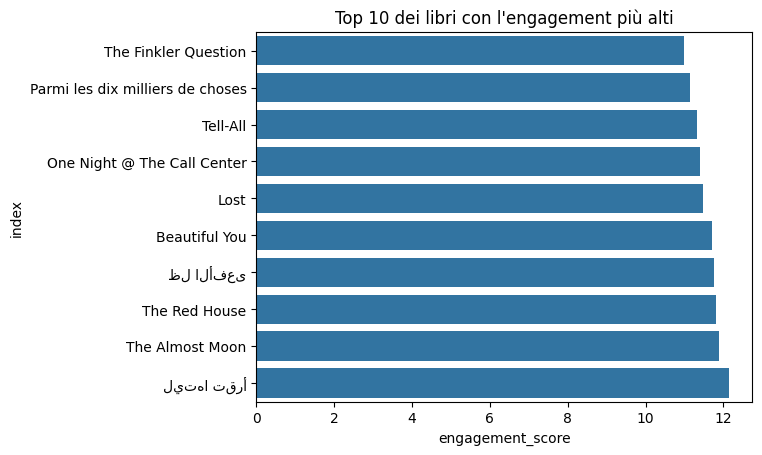

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10 = df.sort_values(by="engagement_score", ascending=True).head(11)

# top_10["original_title"].plot(kind="bar")
sns.barplot(x="engagement_score", y="original_title", data=top_10)
plt.title("Top 10 dei libri con l'engagement più alti")
plt.xlabel("engagement_score")
plt.ylabel("index")
plt.show()


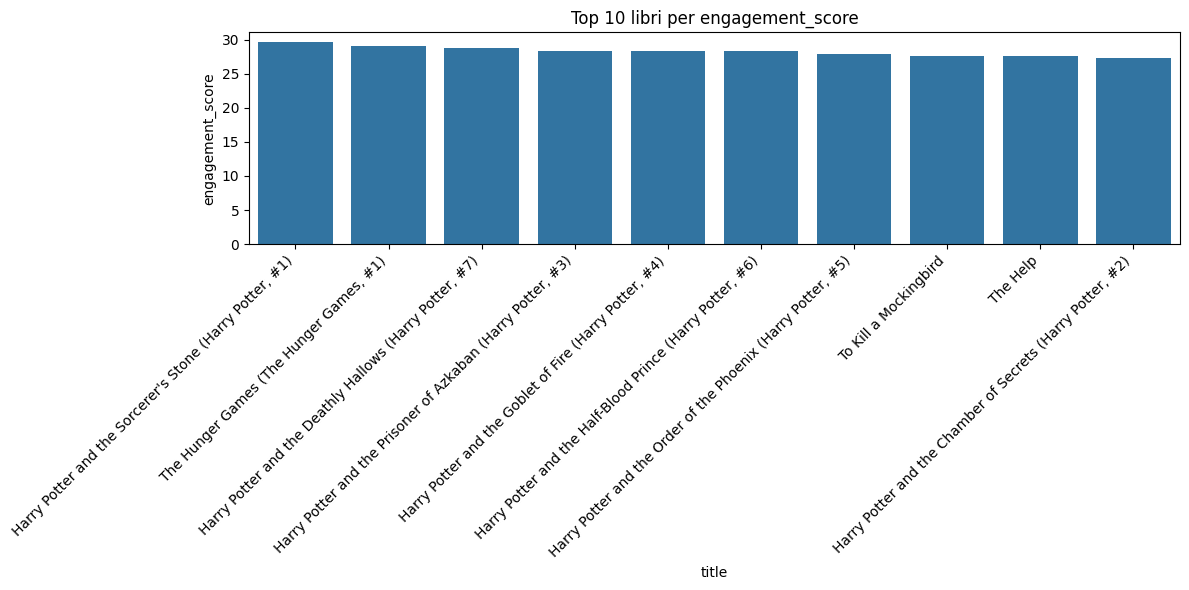

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

top10_books = df.nlargest(10, 'engagement_score')

plt.figure(figsize=(12, 6))
sns.barplot(x='title', y='engagement_score', data=top10_books)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 libri per engagement_score')
plt.tight_layout()
plt.show()


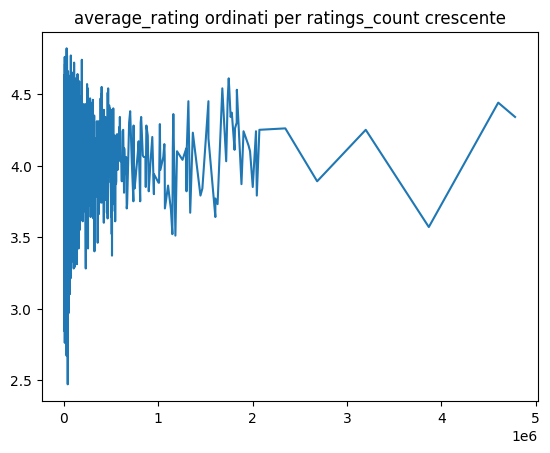

In [32]:


#5. **Crea un grafico a linee** della `average_rating`, ordinando i libri per `ratings_count` crescente.
df_ordinato = df.sort_values(by="ratings_count", ascending=True)#.head(10)

plt.plot(df_ordinato["ratings_count"], df_ordinato["average_rating"])
# sns.lineplot(df_ordinato, y="ratings_count", x="average_rating")
plt.title("average_rating ordinati per ratings_count crescente")
plt.show()

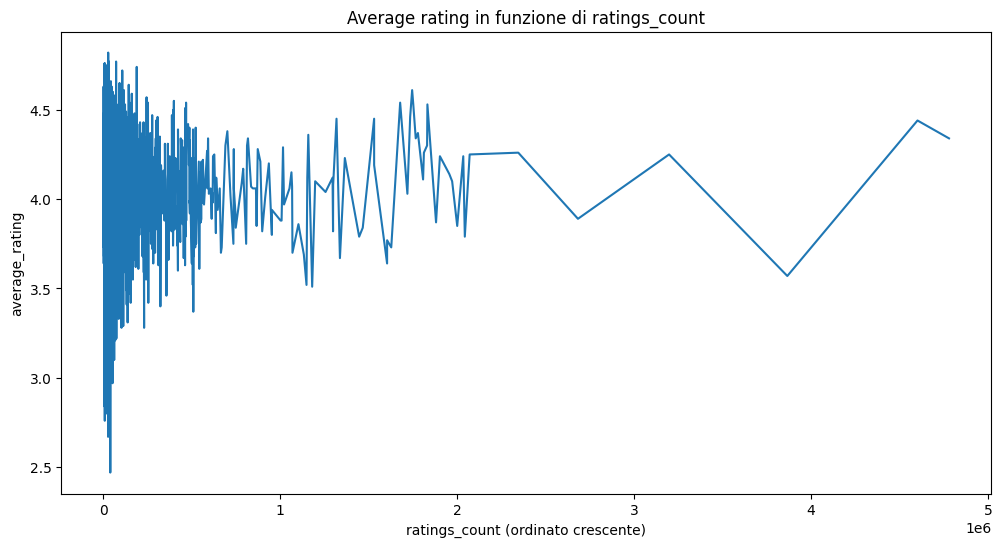

In [33]:
sorted_books = df.sort_values('ratings_count')

plt.figure(figsize=(12, 6))
plt.plot(sorted_books['ratings_count'], sorted_books['average_rating'])
plt.xlabel('ratings_count (ordinato crescente)')
plt.ylabel('average_rating')
plt.title('Average rating in funzione di ratings_count')
plt.show()


## Esercizio 5
Utilizza il dataset `adult.csv`.
Contiene informazioni demografiche su adulti negli Stati Uniti. Le colonne rilevanti sono:
- `age`: età (integer)
- `workclass`, `education`, `marital-status`, `occupation`, `race`, `sex`
- `hours-per-week`: ore lavorate a settimana
- `income`: `>50K` o `<=50K` (target)

1. Quante **righe e colonne** ha il dataset?
2. Quanti **valori mancanti** ci sono per colonna?
3. **Sostituisci i valori mancanti** nelle colonne categoriche (workclass, occupation, native-country) con il valore più frequente (la moda).
4. Calcola l’**età media** (`age`) per sesso (`sex`)
5. Trova la % di persone che guadagnano **>50K** per sesso.
7. Crea una **colonna `age_group`** raggruppando le età in fasce: `'<30'`, `'30-50'`, `'>50'`.
8. **Crea**:
   - un grafico **a barre** con % di reddito `>50K` per fascia di età.
   - un **boxplot** delle ore lavorate (`hours-per-week`) per gruppo reddito (<=50, >50).


In [34]:
dataset = pd.read_csv("adult_con_titoli.csv")

In [35]:
print(f"Il dataset a {dataset.shape[0]} colonne e {dataset.shape[1]} righe.")

Il dataset a 32561 colonne e 15 righe.


In [36]:
print("Numero di valori mancanti per colonna")
dataset.isnull().sum().reset_index()

Numero di valori mancanti per colonna


,index,0
0,age,0
1,workclass,0
2,fnlwgt,0
3,education,0
4,education-num,0
5,marital-status,0
6,occupation,0
7,relationship,0
8,race,0
9,sex,0


In [37]:
# 3. **Sostituisci i valori mancanti** nelle colonne categoriche (workclass, occupation, native-country) con il valore più frequente (la moda).
for var in ["workclass", "occupation","native-country"]:
    dataset[var].fillna(dataset[var].mode()[0])

In [38]:
# 4. Calcola l’**età media** (`age`) per sesso (`sex`)
eta_media_per_sesso = dataset.groupby("sex")["age"].mean().reset_index()
eta_media_per_sesso


,sex,age
0,Female,36.858230
1,Male,39.433547


In [39]:
# 5. Trova la % di persone che guadagnano **>50K** per sesso.
# a = dataset.groupby("sex")["income"].value_counts().reset_index()
# b = a.loc[a["income"] == " >50K", ["sex", "count"]]
# count_f = a.loc[a["sex"] ==" Female", "count"].sum()
# count_u = a.loc[a["sex"] ==" Male", "count"].sum()
# b.loc[a["sex"] ==" Female", "count"] = (b.loc[a["sex"] ==" Female", "count"]/count_f)*100
# b.loc[a["sex"] ==" Male", "count"] = (b.loc[a["sex"] ==" Male", "count"]/count_u)*100
# print("Proporzione in % di persone che guadagnano >50K")

percent_income_by_sex = dataset.groupby('sex')['income'].apply(lambda x: (x == ' >50K').mean() * 100)
print(percent_income_by_sex)
# b

sex
Female    10.946059
Male      30.573658
Name: income, dtype: float64


In [40]:
# 7. Crea una **colonna `age_group`** raggruppando le età in fasce: `'<30'`, `'30-50'`, `'>50'`.
new_var = np.where(dataset["age"] <30, "<30", dataset["age"])
new_var = np.where((dataset["age"]>=30)&(dataset["age"]<=50),"30-50", new_var)
new_var = np.where(dataset["age"]>50,">50", new_var)
dataset["age_group"] = new_var

In [41]:
# 8. **Crea**:
#    - un grafico **a barre** con % di reddito `>50K` per fascia di età.
#    - un **boxplot** delle ore lavorate (`hours-per-week`) per gruppo reddito (<=50, >50).

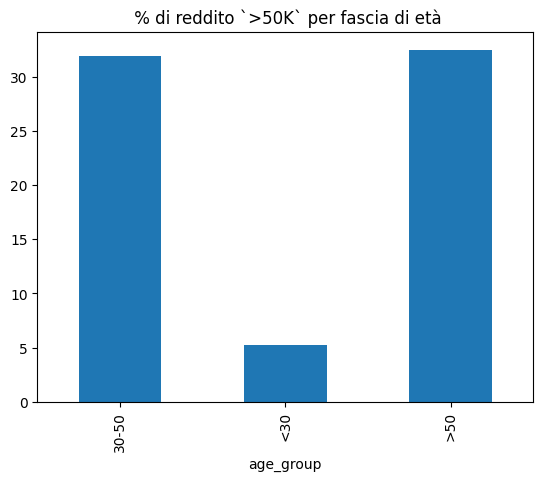

In [42]:
income_freq = dataset.groupby("age_group")["income"].apply(lambda x: (x == " >50K").mean()*100)

income_freq.plot(kind="bar")
plt.title(" % di reddito `>50K` per fascia di età")
plt.show()





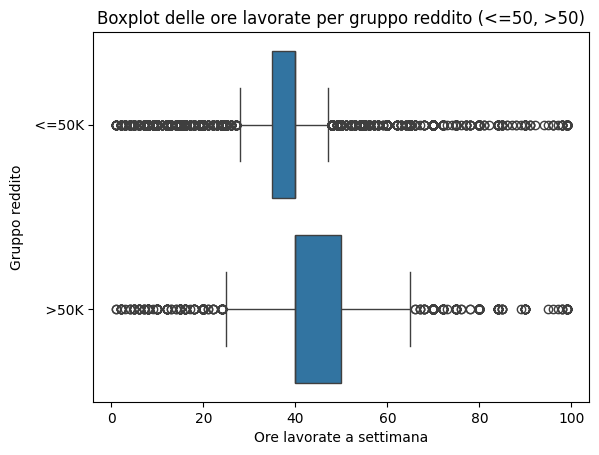

In [43]:
# 8. **Crea**:
#    - un **boxplot** delle ore lavorate (`hours-per-week`) per gruppo reddito (<=50, >50).

sns.boxplot(data=dataset, x="hours-per-week", y="income")
plt.title("Boxplot delle ore lavorate per gruppo reddito (<=50, >50)")
plt.xlabel("Ore lavorate a settimana")
plt.ylabel("Gruppo reddito")
plt.show()

In [44]:
dataset.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30-50
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,30-50
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30-50
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,>50
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,<30


## Esercizio 6

Genera due array:

`x = np.linspace(0, 5, 80)`  
`y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)`

1. Usa `scipy.optimize.curve_fit` per stimare i parametri della retta.
2. Plotta i punti originali e la retta ottenuta.
3. Calcola MAE e RMSE tra i valori reali e quelli stimati.

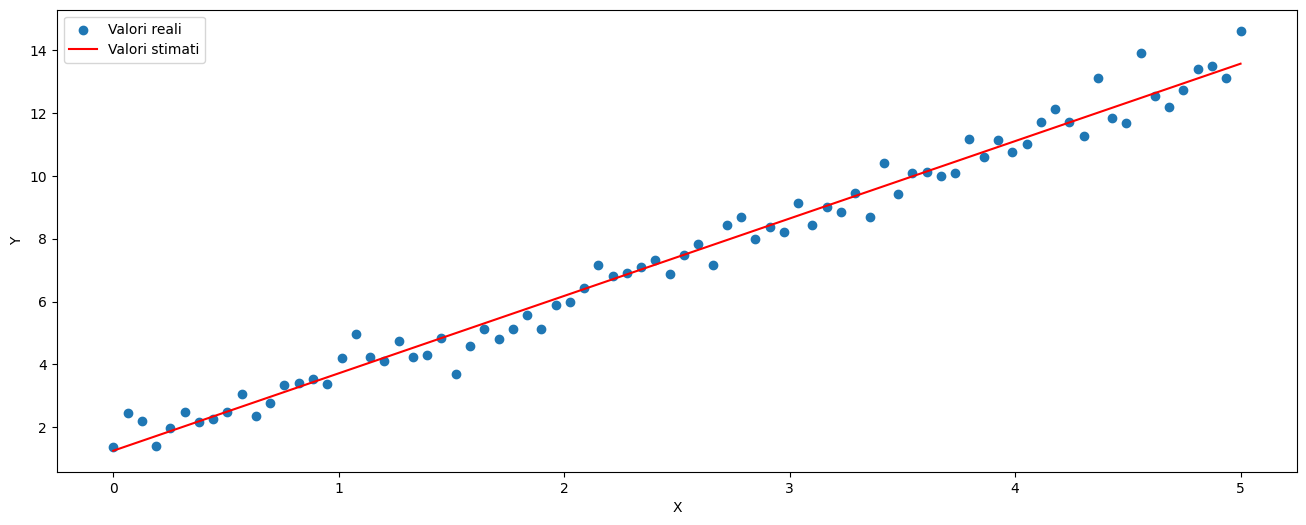

In [45]:
from scipy.optimize import curve_fit

x = np.linspace(0, 5, 80)
y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)

def retta(x,a,b):
    return a*x +b

parametri, _= curve_fit(retta, x, y)
a, b = parametri

plt.figure(figsize=(16,6))
plt.scatter(x=x, y=y, label="Valori reali")
plt.plot(x, retta(x,a,b), color="red", label="Valori stimati")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [46]:
# 3. Calcola MAE e RMSE tra i valori reali e quelli stimati.
y_pred = retta(x,a,b)

rmse = np.sqrt(np.sum((y-y_pred)**2)/len(y))
mae = np.sum(np.abs(y-y_pred))/len(y)
print(f"RMSE ={rmse:.3f}, MAE ={mae:.3f}")

RMSE =0.481, MAE =0.369
